In [1]:
import sys
sys.path.append('..')
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim.adam import Adam

In [2]:
from metrics import VAELoss
from data import LoFiDataset
from vae import DenseVAE

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
dataset = LoFiDataset('../data')

In [5]:
batch_size = 32
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [6]:
model = DenseVAE(2, dataset[0].shape[0], 400, 100, 2, device).to(device)
optimizer = Adam(model.parameters(), lr=1e-3)
loss_function = VAELoss()

KeyboardInterrupt: 

In [7]:
model

DenseVAE(
  (encoder): DenseEncoder(
    (block): Sequential(
      (0): Linear(in_features=32921, out_features=400, bias=True)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Linear(in_features=400, out_features=100, bias=True)
      (3): LeakyReLU(negative_slope=0.2)
    )
  )
  (mean_layer): Linear(in_features=100, out_features=2, bias=True)
  (logvar_layer): Linear(in_features=100, out_features=2, bias=True)
  (decoder): DenseDecoder(
    (block): Sequential(
      (0): Linear(in_features=2, out_features=100, bias=True)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Linear(in_features=100, out_features=200, bias=True)
      (3): LeakyReLU(negative_slope=0.2)
      (4): Linear(in_features=200, out_features=400, bias=True)
      (5): LeakyReLU(negative_slope=0.2)
      (6): Linear(in_features=400, out_features=32921, bias=True)
      (7): Tanh()
    )
  )
)

In [8]:
from utils import train, save_sample

In [9]:
loss_curve = train(model, train_loader, loss_function, optimizer, epochs=100, device=device, save_path='best_model.pth')

	[TRAINING] Epoch 1 	Average Loss:  0.03516636167963346
	[INFO] Best model saved at epoch 1, loss: 0.03516636167963346
	[TRAINING] Epoch 2 	Average Loss:  0.05580258866151174
	[TRAINING] Epoch 3 	Average Loss:  0.06530903015906613
	[TRAINING] Epoch 4 	Average Loss:  0.11993218904050688
	[TRAINING] Epoch 5 	Average Loss:  0.12098317205285032
	[TRAINING] Epoch 6 	Average Loss:  1.6023097701060276
	[TRAINING] Epoch 7 	Average Loss:  0.13342697468275824
	[TRAINING] Epoch 8 	Average Loss:  0.17564710695296526
	[TRAINING] Epoch 9 	Average Loss:  0.21956442948430777
	[TRAINING] Epoch 10 	Average Loss:  0.9891241654986516
	[TRAINING] Epoch 11 	Average Loss:  1.0318070459664643
	[TRAINING] Epoch 12 	Average Loss:  0.28597888226310414
	[TRAINING] Epoch 13 	Average Loss:  0.5270680180013491
	[TRAINING] Epoch 14 	Average Loss:  0.11427533777896315
	[TRAINING] Epoch 15 	Average Loss:  0.04814788066626837


KeyboardInterrupt: 

In [ ]:
plt.plot(loss_curve)

NameError: name 'loss_curve' is not defined

In [11]:
model.load_state_dict(torch.load('best_model.pth', weights_only=True))

<All keys matched successfully>

torch.Size([1, 2])


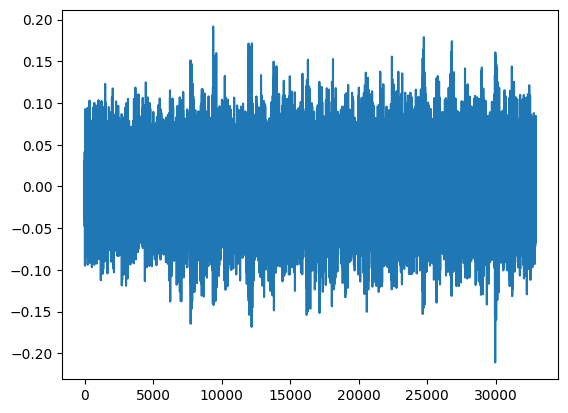

In [ ]:
a = model.sample()
b = save_sample(a, 'asd.wav')
plt.plot(b[0])